# K Means Clustering

## Import Libraries

** Import the libraries you usually use for data analysis.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

** Read in the College_Data file using read_csv. Figure out how to set the first column as the index.**

In [11]:
df = pd.read_csv('./clean_data/adult_train.txt',index_col=False)
#df.head()
#df.info()
#df.describe()
#g = sns.FacetGrid(df,hue="income",palette="Set1",size=5,aspect=1.6)
#g = g.map(plt.hist,'age',bins=20,alpha=0.7)
#g = sns.FacetGrid(df,hue="sex",palette="Set1",size=5,aspect=1.6)
#g = g.map(plt.hist,'hr_per_week',bins=20,alpha=0.7)

## K Means Cluster Creation

** Import KMeans from SciKit Learn.**

In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix,classification_report

In [4]:
kmeans = KMeans(n_clusters=2, random_state=111)
kmeans.fit(df.drop('income',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=111, tol=0.0001, verbose=0)

In [5]:
print(confusion_matrix(df['income'],kmeans.labels_))
print(classification_report(df['income'],kmeans.labels_))

[[13957  8697]
 [ 2343  5165]]
             precision    recall  f1-score   support

          0       0.86      0.62      0.72     22654
          1       0.37      0.69      0.48      7508

avg / total       0.74      0.63      0.66     30162



In [ ]:
# Elbow criterion
def elbow_plot(data, maxK=10, seed_centroids=None):
    """
        parameters:
        - data: pandas DataFrame (data to be fitted)
        - maxK (default = 10): integer (maximum number of clusters with which to run k-means)
        - seed_centroids (default = None ): float (initial value of centroids for k-means)
    """
    sse = {}
    for k in range(1, maxK):
        print("k: ", k)
        if seed_centroids is not None:
            seeds = seed_centroids.head(k)
            kmeans = KMeans(n_clusters=k, max_iter=500, n_init=100, random_state=0, init=np.reshape(seeds, (k,1))).fit(data)
            data["clusters"] = kmeans.labels_
        else:
            kmeans = KMeans(n_clusters=k, max_iter=300, n_init=100, random_state=0).fit(data)
            data["clusters"] = kmeans.labels_
        # Inertia: Sum of distances of samples to their closest cluster center
        sse[k] = kmeans.inertia_
    plt.figure()
    plt.plot(list(sse.keys()), list(sse.values()))
    plt.show()
    return

sns.set_style("whitegrid")
elbow_plot(train, maxK=30)

**Let's normalize the Data and apply clustering**

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)

In [8]:
df_norm = pd.DataFrame(scaled_data, columns = df.columns)
df_norm = df_norm.drop('income',axis=1)

In [9]:
kmeans.fit(df_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=111, tol=0.0001, verbose=0)

In [10]:
print(confusion_matrix(df['income'],kmeans.labels_))
print(classification_report(df['income'],kmeans.labels_))

[[ 6871 15783]
 [ 5736  1772]]
             precision    recall  f1-score   support

          0       0.55      0.30      0.39     22654
          1       0.10      0.24      0.14      7508

avg / total       0.43      0.29      0.33     30162



### Apply PCA to Normalized Data

In [11]:
from sklearn.decomposition import PCA

In [12]:
pca = PCA(n_components=2)
pca.fit(df_norm)
pca2 = pca.transform(df_norm)

In [13]:
df_norm.shape, pca2.shape

((30162, 65), (30162, 2))

In [14]:
pca.explained_variance_ratio_

array([ 0.07067388,  0.0410384 ])

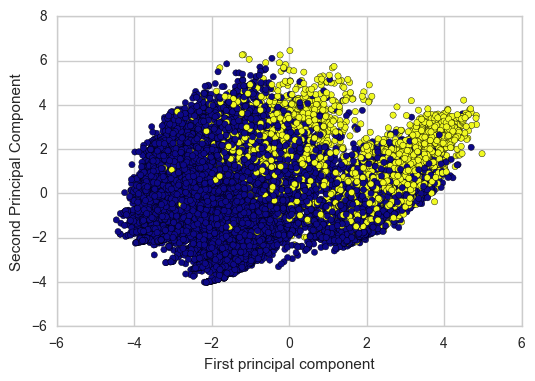

In [15]:
# let's plot it
sns.set_style("whitegrid")
plt.figure(figsize=(6,4))
plt.scatter(pca2[:,0],pca2[:,1],c=df['income'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [16]:
kmeans.fit(pca2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=111, tol=0.0001, verbose=0)

In [17]:
print(confusion_matrix(df['income'],kmeans.labels_))
print(classification_report(df['income'],kmeans.labels_))

[[ 7246 15408]
 [ 6053  1455]]
             precision    recall  f1-score   support

          0       0.54      0.32      0.40     22654
          1       0.09      0.19      0.12      7508

avg / total       0.43      0.29      0.33     30162



### Try 3 Components

In [18]:
from mpl_toolkits.mplot3d import Axes3D

In [19]:
pca = PCA(n_components=3)
pca.fit(df_norm)
pca3 = pca.transform(df_norm)

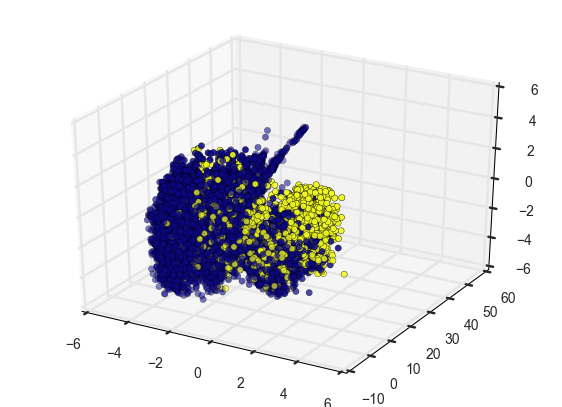

In [20]:
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca3[:,0], np.exp(-pca3[:,1]),pca3[:,2],c=df['income'],cmap='plasma')

In [21]:
d = {'pca1': pca3[:,0], 'pca2': np.exp(-pca3[:,1]), 'pca3': pca3[:,2]}
df_pca3 = pd.DataFrame(d)


In [22]:
kmeans.fit(df_pca3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=111, tol=0.0001, verbose=0)

In [23]:
print(confusion_matrix(df['income'],kmeans.labels_))
print(classification_report(df['income'],kmeans.labels_))

[[ 1610 21044]
 [    3  7505]]
             precision    recall  f1-score   support

          0       1.00      0.07      0.13     22654
          1       0.26      1.00      0.42      7508

avg / total       0.82      0.30      0.20     30162



## Try it on whole data

In [24]:
pca_all = PCA(n_components=0.99,  svd_solver = 'full')
#pca_all.fit(df_norm)
pca_all.fit(df.drop('income',axis=1))
pca_n = pca_all.transform(df_norm)

In [25]:
# remaining components
pca_all.n_components_

4

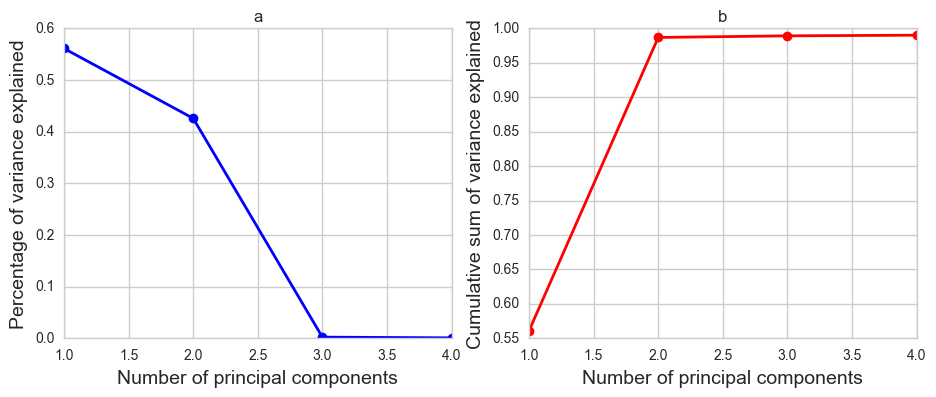

In [26]:
y = pca_all.explained_variance_ratio_
x = np.arange(len(y)) + 1
fig = plt.figure(figsize=(11,4))
sub1 = plt.subplot(121, title = 'a')
plt.xlabel('Number of principal components', fontsize = 14)
plt.ylabel('Percentage of variance explained', fontsize = 14)
plt.plot(x ,y, '-o',lw=2., color='blue')

sub2 = plt.subplot(122, title = 'b')
plt.xlabel('Number of principal components', fontsize = 14)
plt.ylabel('Cumulative sum of variance explained', fontsize = 14)
plt.plot(x ,np.cumsum(y), '-o',lw=2.0, color='red')

In [27]:
pca_n.shape

(30162, 4)

In [28]:
kmeans.fit(pca_n)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=111, tol=0.0001, verbose=0)

In [29]:
print(confusion_matrix(df['income'],kmeans.labels_))
print(classification_report(df['income'],kmeans.labels_))

[[15754  6900]
 [ 1799  5709]]
             precision    recall  f1-score   support

          0       0.90      0.70      0.78     22654
          1       0.45      0.76      0.57      7508

avg / total       0.79      0.71      0.73     30162

